### Step 1: Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 2: Reading Dataset

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

### Analyzing the Data
- The main goal of data understanding is to gain general insights about the data,
- which covers the number of rows and columns, values in the data, datatypes, 
and Missing values in the dataset.

In [4]:
# diplay number of rows and columns
df.shape

(7043, 21)

In [5]:
# display the top 5 rows in dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# display last 5 rows in dataset
df.tail(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* info() : 
    1. helps to understand the data type and information about data, 
    including the number of records in each column, data having null 
    or not null, Data type, the memory usage of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.info() shows that Seniorcitizen,tenure and MonthlyChrges  are numerical variable and the reset of columns is categorical variable 

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Check for Duplication

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Missing Values Calculation

In [10]:
## Data cleaning
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# we will calculate percentage of null values
(df.isnull().sum()/len(df))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Note : thier is not null values

### df.describe(include='O').T
is used to get a summary of the categorical columns in a DataFrame. The describe() method in Pandas produces a table of summary statistics for each column in a DataFrame. The include='O' argument specifies that only the categorical columns should be included in the summary. The .T method transposes the DataFrame, so that the column names are in the rows and the summary statistics are in the columns

In [13]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


from the discription we have a white  space in TotalCharges with 11 frequency

In [14]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [15]:
# we will display all wight space  value
total_charge = df['TotalCharges']
df[total_charge ==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
# convert TotalCharges column into numeric and enforce wihte space inot NON
#  coerce : replace any values that cannot be converted to numeric with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],'coerce')

In [17]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [18]:
len(df[df['TotalCharges'] == ' '])

0

In [19]:
df.TotalCharges.isnull().sum()

11

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Handling missing values 
* we will handel 11 missing values in the TotalCharges column
* we have more than one option to fill null values using mean,medien,mode 
* let discover what is the best way for filling null values in my data

<Axes: ylabel='TotalCharges'>

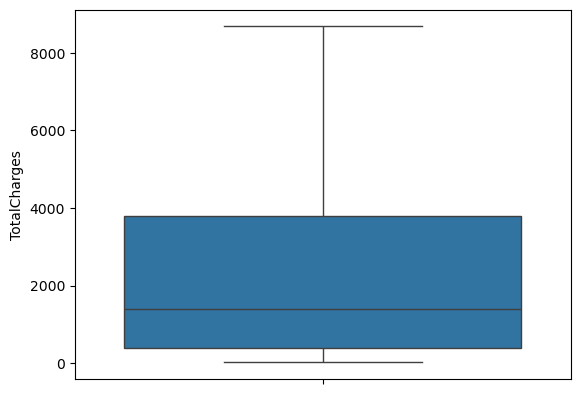

In [21]:
# box plot , denisty plot for deciding which imputation teqniques to use
sns.boxplot(df['TotalCharges'])

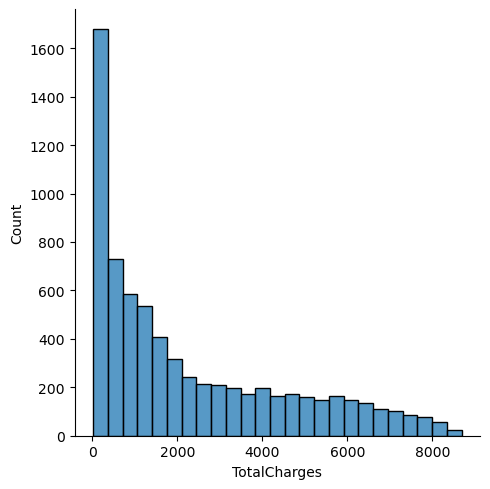

In [22]:
sns.displot(df['TotalCharges'])

As the distribution of totalcharges is skewed, we can impute the missing values with its median Median imputation is a better imputation method for skewed data because it is not as sensitive to outliers as mean imputation. The median is the middle value in a data set, so it is not affected by outliers. This makes median imputation a more robust imputation method than mean imputation

In [23]:
# fill missing values using median 
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].median())


In [24]:
# check if their is null values or not 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 3: Data Reduction
Some columns or variables can be dropped if they do not add value to our analysis.

In [25]:
# we will remove customerId
df = df.drop('customerID',axis=1) # remove customerID 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Step 4: Feature Engineering
### Step 5: Data Cleaning/Wrangling
### Step 6: EDA Exploratory Data Analysis



In [26]:
### lets separate data into categorical and numerical variables
cat_col = df.select_dtypes(include=('object')).columns.tolist()
num_col = df.select_dtypes(include=np.number).columns.tolist()

print("Categorical variables")
print(cat_col)
print("numerical variables")
print(num_col)

Categorical variables
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical variables
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Step 7: EDA Univariate Analysis
Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

 histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

SeniorCitizen
skew: 1.83


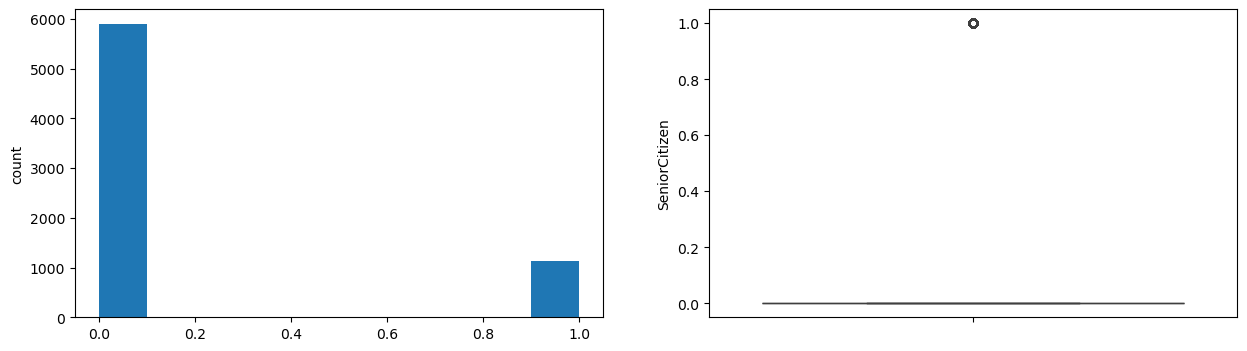

tenure
skew: 0.24


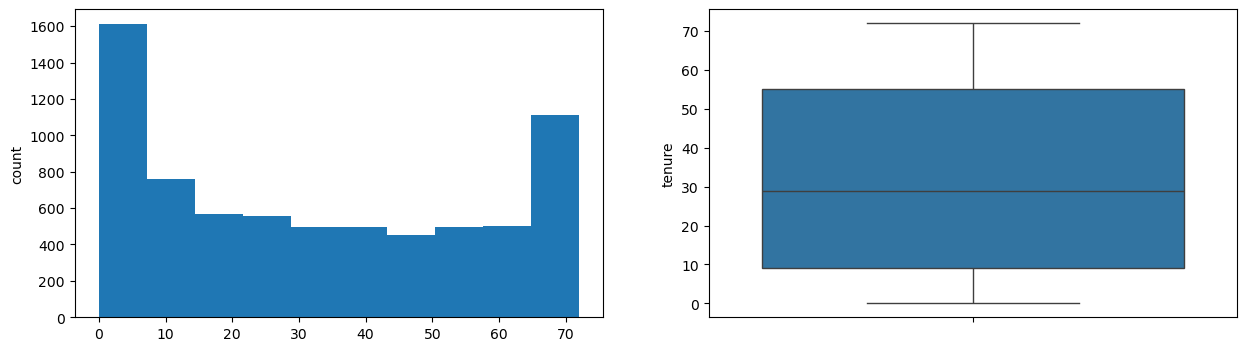

MonthlyCharges
skew: -0.22


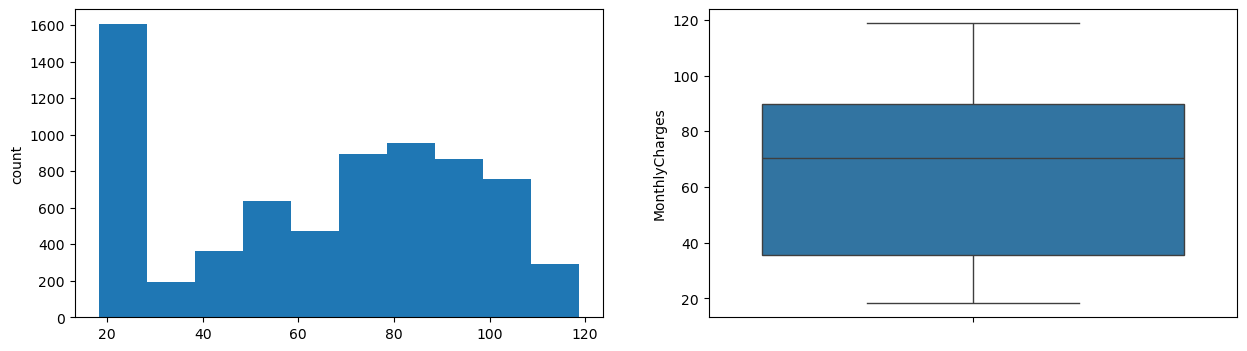

TotalCharges
skew: 0.96


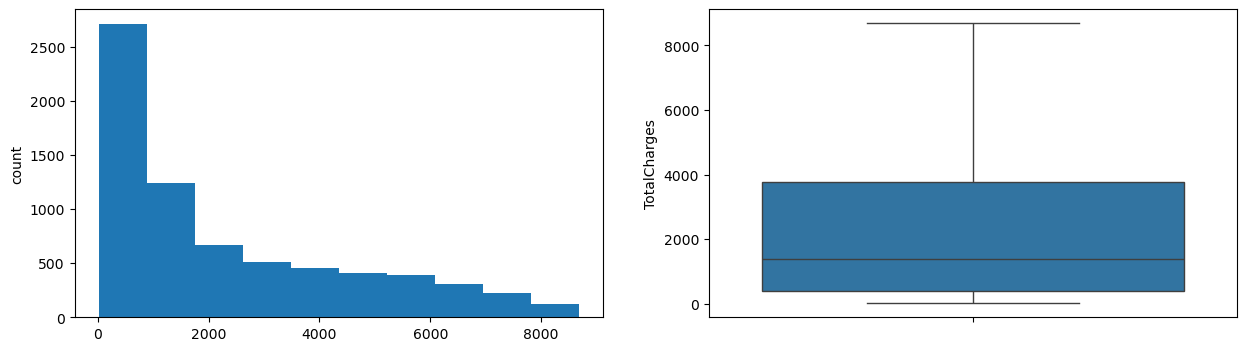

In [28]:
for col in num_col:
    print(col)
    print('skew:',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

### Handling categorical data into numerical data using labelEncoder

In [29]:
le = LabelEncoder()
df[cat_col] = df[cat_col].apply(lambda col : le.fit_transform(col.astype(str)))

In [30]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### feature scaling for numerical columns using StandardScaler

In [31]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
df[num_col]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994242
1,-0.439916,0.066327,-0.259629,-0.173244
2,-0.439916,-1.236724,-0.362660,-0.959674
3,-0.439916,0.514251,-0.746535,-0.194766
4,-0.439916,-1.236724,0.197365,-0.940470
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655
7039,-0.439916,1.613701,1.277533,2.243151
7040,-0.439916,-0.870241,-1.168632,-0.854469
7041,2.273159,-1.155283,0.320338,-0.872062


### Split data into train , validation and test

In [33]:
x = df.drop('Churn',axis=1)
y = df['Churn']

x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.2,random_state=1)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.2,random_state=1)


### Build ML Model

In [36]:
log_reg = LogisticRegression(solver='liblinear',random_state=1)
# Train model
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [40]:
y_val_hat = log_reg.predict_proba(x_val)
print(y_val_hat)

[[0.62018709 0.37981291]
 [0.44964442 0.55035558]
 [0.77799566 0.22200434]
 ...
 [0.99602639 0.00397361]
 [0.9600614  0.0399386 ]
 [0.76116741 0.23883259]]


In [42]:
y_test_hat_pro = log_reg.predict_proba(x_test)
print(y_test_hat)

[[0.41253518 0.58746482]
 [0.60323683 0.39676317]
 [0.95425409 0.04574591]
 [0.9451874  0.0548126 ]
 [0.82236361 0.17763639]
 [0.30611947 0.69388053]
 [0.48854482 0.51145518]
 [0.37445144 0.62554856]
 [0.27918399 0.72081601]
 [0.87516359 0.12483641]
 [0.99366319 0.00633681]
 [0.78660581 0.21339419]
 [0.96835303 0.03164697]
 [0.67946654 0.32053346]
 [0.87628659 0.12371341]
 [0.91801428 0.08198572]
 [0.79410449 0.20589551]
 [0.36965724 0.63034276]
 [0.79391803 0.20608197]
 [0.3364654  0.6635346 ]
 [0.99205035 0.00794965]
 [0.41228669 0.58771331]
 [0.766601   0.233399  ]
 [0.9660676  0.0339324 ]
 [0.34767933 0.65232067]
 [0.93504819 0.06495181]
 [0.98215648 0.01784352]
 [0.6945591  0.3054409 ]
 [0.69328171 0.30671829]
 [0.29450755 0.70549245]
 [0.996719   0.003281  ]
 [0.99501695 0.00498305]
 [0.94027248 0.05972752]
 [0.43550003 0.56449997]
 [0.87824153 0.12175847]
 [0.32264087 0.67735913]
 [0.79457045 0.20542955]
 [0.91182427 0.08817573]
 [0.97220871 0.02779129]
 [0.37272838 0.62727162]


In [43]:
y_test_hat = log_reg.predict(x_test)
print(y_test_hat)

[1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


### Calculate Accuracy of our model
The log_reg.score(X, y) method in scikit-learn is used to evaluate the performance of your logistic regression model. It calculates a metric called accuracy, which tells you how often the model makes correct predictions on a given set of data (X and y).

In [45]:
print("Train Accuracy is : ",round(log_reg.score(x_train,y_train),2))
print("Train Accuracy is : ",round(log_reg.score(x_val,y_val),2))
print("Train Accuracy is : ",round(log_reg.score(x_test,y_test),2))

Train Accuracy is :  0.8
Train Accuracy is :  0.81
Train Accuracy is :  0.79
